In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import preprocessing

In [2]:
data=pd.read_csv(r'C:\Users\Darshil Shetty\Downloads\regression1234.zip')

In [3]:
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
print(data[data['age'].isna()])
print(data[data['sex'].isna()])
print(data[data['bmi'].isna()])
print(data[data['children'].isna()])
print(data[data['smoker'].isna()])
print(data[data['region'].isna()])
print(data[data['charges'].isna()])

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [30]:
data.columns[data.dtypes=='object']

Index(['sex', 'smoker', 'region'], dtype='object')

In [35]:
data.columns[data.dtypes==np.number]

Index(['bmi', 'charges'], dtype='object')

In [36]:
data_category=data.select_dtypes(include=['object'])

In [40]:
data_num=data.select_dtypes(include=[np.number])

In [190]:
label_encoder=preprocessing.LabelEncoder()
data_r=label_encoder.fit_transform(data['region'])
data_s=label_encoder.fit_transform(data['sex'])
data_sm=label_encoder.fit_transform(data['smoker'])
data_category=pd.DataFrame({'sex':data_s,'region':data_r,'smoker':data_sm})

In [192]:
data_category

,sex,region,smoker
0,0,3,1
1,1,2,0
2,1,2,0
3,1,1,0
4,1,1,0
...,...,...,...
1333,1,1,0
1334,0,0,0
1335,0,2,0
1336,0,3,0


In [ ]:
print(data_num)
data_num['children'].value_counts()

In [49]:
data['age'].sort_values(ascending=False)

335     64
603     64
752     64
1265    64
534     64
        ..
942     18
46      18
295     18
50      18
648     18
Name: age, Length: 1338, dtype: int64

In [193]:
data_combo=pd.concat([data_num,data_category],axis=1)
print(data_combo)

      age     bmi  children      charges  sex  region  smoker
0      19  27.900         0  16884.92400    0       3       1
1      18  33.770         1   1725.55230    1       2       0
2      28  33.000         3   4449.46200    1       2       0
3      33  22.705         0  21984.47061    1       1       0
4      32  28.880         0   3866.85520    1       1       0
...   ...     ...       ...          ...  ...     ...     ...
1333   50  30.970         3  10600.54830    1       1       0
1334   18  31.920         0   2205.98080    0       0       0
1335   18  36.850         0   1629.83350    0       2       0
1336   21  25.800         0   2007.94500    0       3       0
1337   61  29.070         0  29141.36030    0       1       1

[1338 rows x 7 columns]


In [194]:
data_combo.isnull().sum()

age         0
bmi         0
children    0
charges     0
sex         0
region      0
smoker      0
dtype: int64

In [195]:
data_combo.sort_values(by='children',ascending=False)

,age,bmi,children,charges,sex,region,smoker
1272,43,25.520,5,14478.33015,1,2,0
1130,39,23.870,5,8582.30230,0,2,0
1116,41,29.640,5,9222.40260,1,0,0
568,49,31.900,5,11552.90400,0,3,0
1245,28,24.300,5,5615.36900,1,3,0
...,...,...,...,...,...,...,...
618,19,33.110,0,34439.85590,0,2,1
619,55,37.100,0,10713.64400,0,3,0
623,18,33.535,0,34617.84065,1,0,1
624,59,28.785,0,12129.61415,1,1,0


In [196]:
data_combo.corr()

,age,bmi,children,charges,sex,region,smoker
age,1.000000,0.109272,0.042469,0.299008,-0.020856,0.002127,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.157566,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.016569,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.057292,-0.006208,0.787251
sex,-0.020856,0.046371,0.017163,0.057292,1.000000,0.004588,0.076185
region,0.002127,0.157566,0.016569,-0.006208,0.004588,1.000000,-0.002181
smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,-0.002181,1.000000


<Axes: >

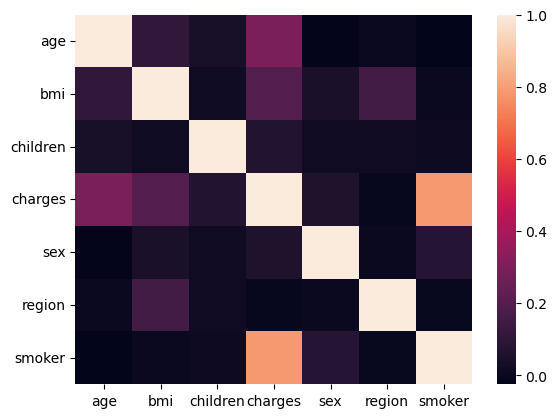

In [197]:
sns.heatmap(data_combo.corr())

In [198]:
x=data_combo.drop('charges',axis=1)

In [199]:
y=data_combo['charges']

In [200]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [201]:
lr=LinearRegression()

In [202]:
lr.fit(x_train,y_train)

LinearRegression()

In [203]:
lr.intercept_

-11946.60656726303

In [204]:
lr.coef_

array([ 2.57056264e+02,  3.35781491e+02,  4.25091456e+02, -1.87914567e+01,
       -2.71284266e+02,  2.36478181e+04])

In [205]:
pd.DataFrame(lr.coef_,x_test.columns)

,0
age,257.056264
bmi,335.781491
children,425.091456
sex,-18.791457
region,-271.284266
smoker,23647.818096


In [206]:
y_predict1=lr.predict(x_train)
y_predict=lr.predict(x_test)
print(y_predict1)
print(y_predict)

[ 7155.72095161  8301.24368501  9225.27847635 ... 11397.1643032
 37231.82236887 11398.71025918]
[ 8924.40724442  7116.29501758 36909.01352144  9507.87469118
 27013.3500079  10790.77956153   226.29844571 16942.71599941
  1056.63079407 11267.91997309 28048.59793155  9424.36324087
  5326.32232088 38460.06017922 40303.40597026 37147.01010262
 15287.91876684 35965.05485917  9179.1753067  31510.8319849
  3797.79068365 10070.82803304  2312.57551348  7074.41348194
 11352.37224357 12907.77079523 14448.84678727  6205.65997921
  9917.00839638  2239.50032819  9060.55469043 13120.56214535
  4617.70702822  3467.91218926  4402.74821855 12967.91608907
  1927.44498944  8757.9180081  33324.35180597 32638.47697026
  3852.41756615  4370.39670883 14080.76023234 11478.63402576
  8829.26135924 12046.15119133  5322.80515731  3100.71182484
 35546.60547574  9201.61196817 15894.23763341  2406.04003607
 12397.52052544  1433.90617387 13448.14094304 12519.54174599
  4295.28664609 32202.67982224 13263.171278   12842

In [208]:
mse1=mean_squared_error(y_train,y_predict1)
r21=r2_score(y_train,y_predict1)
mse=mean_squared_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)
print(mse1)
print(r21)
print(mse)
print(r2)

37280663.22256598
0.7417049283233981
33635210.43117842
0.7833463107364538


In [209]:
rmse=mse*(1/2)
print(rmse)


16817605.21558921


In [210]:
df1=pd.DataFrame({'actual':y_test,'predicted':y_predict})
print(df1)

           actual     predicted
764    9095.06825   8924.407244
887    5272.17580   7116.295018
890   29330.98315  36909.013521
1293   9301.89355   9507.874691
259   33750.29180  27013.350008
...           ...           ...
109   47055.53210  39116.968669
575   12222.89830  11814.555568
535    6067.12675   7638.107736
543   63770.42801  40959.081722
846    9872.70100  12258.228529

[268 rows x 2 columns]
